## Основы работы в библиотеке NumPy

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

In [2]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# проимпортируем библиотеку NumPy
import numpy as np

Создадим массив NumPy

In [ ]:
a = np.array([0, 1, 2, 3])
a

Такой массив может содержать любые числовые значения:
- физические величины в разые моменты времени при моделировании
- измеренные сигналы
- интенсивности пикселов
- ...

**Основное преимущество NumPy:** эффективность базовых операций 


In [ ]:
L = list(range(1000))

In [ ]:
%timeit -n 1 [i**2 for i in L]

In [3]:
a = np.arange(1000)

In [11]:
b = a.reshape((10,100)).reshape((1000))
b.ndim

1

In [ ]:
%timeit -n 1 a**2

поиск в документации


In [ ]:
np.lookfor('create array') 

#### Библиотеку принято импортировать так

In [ ]:
import numpy as np

## Создание массивов

* **1-D**:


In [ ]:
a = np.array([0, 1, 2, 3])
a

In [ ]:
a.ndim

In [ ]:
a.shape

In [ ]:
len(a)

* **2-D, 3-D, ...**:


In [ ]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

In [ ]:
b.ndim

In [ ]:
b.shape

In [ ]:
len(b)     # returns the size of the first dimension

In [ ]:
c = np.array([[[1], [2]], [[3], [4]]])
c

In [ ]:
c.shape

## Методы для создания массивов

На практике мы редко добавляем элементы по одному


- Равномерно распределенные элементы:


In [ ]:
a = np.arange(10) # 0 .. n-1  (!)
a

In [ ]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

- по числу элементов:


In [ ]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

In [ ]:
d = np.linspace(0, 1, 5, endpoint=False)
d

- Часто встречающиеся массивы:


In [ ]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

In [ ]:
b = np.zeros((2, 2))
b

In [ ]:
c = np.eye(3)
c

In [ ]:
d = np.diag(np.array([1, 2, 3, 4]))
d

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [ ]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

In [ ]:
b = np.random.randn(4)      # Gaussian
b  

In [ ]:
np.random.seed(1234)        # Setting the random seed

## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [ ]:
a = np.array([1, 2, 3])
a.dtype

In [ ]:
b = np.array([1., 2., 3.])
b.dtype

Можно задать тип данных явно. По умолчанию - `float64`

In [ ]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

In [ ]:
a = np.ones((3, 3))
a.dtype

Прочие типы данных:

- Комплексные числа


In [ ]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

 - Bool


In [ ]:
e = np.array([True, False, False, True])
e.dtype

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [ ]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters

## Основы визуализации

$ ipython notebook --pylab=inline

Или из тетрадки:

In [ ]:
%pylab inline

Параметр `inline` говорит серверу IPython о том, что результаты будут отображаться в самой тетрадке, а не в новом окне. 


Импортируем *Matplotlib*


In [12]:
import matplotlib.pyplot as plt  # the tidy way

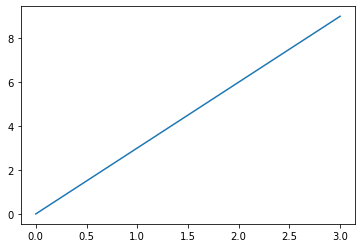

In [13]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    
plt.show()           # <-- shows the plot (not needed with pylab) 

Или с использованием *pylab*:


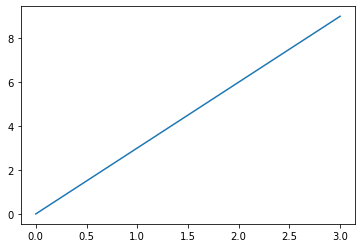

In [15]:
plt.plot(x, y)       # line plot    

Использование `import matplotlib.pyplot as plt` рекомендуется для скриптов, а `pylab` - в тетрадках IPython.

 - Отображение одномерных массивов:


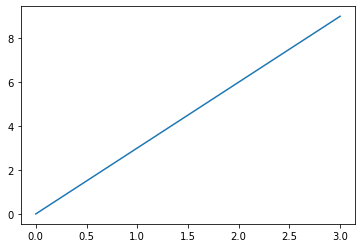

In [16]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

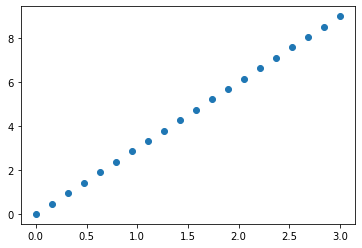

In [17]:
plt.plot(x, y, 'o')  # dot plot    

- Отображение двухмерных массивов (например, изображений):


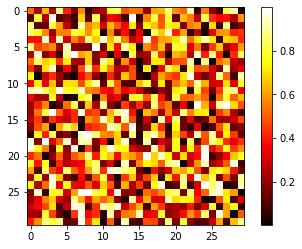

In [18]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [ ]:
a = np.arange(10)
a

In [ ]:
a[0], a[2], a[-1]

Работает и популярный в Python способ отражения массива:


In [ ]:
a[::-1]

Для многомерных массивов индексы - это кортежи целых чисел


In [ ]:
a = np.diag(np.arange(3))
a

In [ ]:
a[1, 1]

In [ ]:
a[2, 1] = 10 # third line, second column
a

In [ ]:
a[1]

**Срезы**

In [ ]:
a = np.arange(10)
a

In [ ]:
a[2:9:3] # [start:end:step]

Последний индекс не включается

In [ ]:
a[:4]

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [ ]:
a[1:3]

In [ ]:
a[::2]

In [ ]:
a[3:]

Можно совмещать присваивание и срез:


In [ ]:
a = np.arange(10)
a[5:] = 10
a

In [ ]:
b = np.arange(5)
a[5:] = b[::-1]
a

## Пример. Матрица делителей

Отобразить матрицу, в которой вычеркивается **(x, y)**, если **y** делится на **x**.

In [ ]:
from IPython.display import Image
Image(filename='../../img/prime-sieve.png')

* Создадим массив `is_prime`, заполненний значениями True


In [ ]:
is_prime = np.ones((100,), dtype=bool)

* Вычеркнем 0 и 1 как не являющиеся простыми:


In [ ]:
is_prime[:2] = 0

* Для каждого натурального `j` начиная с  2, "вычеркнем" числа, ему кратные:


In [ ]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j] = False
    
is_prime

## Индексирование масками

In [ ]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

In [ ]:
(a % 3 == 0)

In [ ]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [ ]:
a[a % 3 == 0] = -1
a

### Индексирование массивом целых чисел

In [ ]:
a = np.arange(0, 100, 10)
a

In [ ]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

In [ ]:
a[[9, 7]] = -100
a

In [ ]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

In [ ]:
a[idx]